In [52]:
import pandas as pd
import numpy as np

In [53]:
df = pd.read_csv(r'C:\Users\hp\Downloads\insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [54]:
duplicates = df.duplicated().sum()
duplicates

1

In [55]:
df.drop_duplicates(inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [56]:
null_values = df.isnull().sum()
null_values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
lab_encode = LabelEncoder()

In [59]:
for col in ['sex', 'smoker']:
    lab_encode.fit(df[col])
    df[col] = lab_encode.transform(df[col])

In [60]:
one_hot_encode = pd.get_dummies(df['region'])

In [61]:
one_hot_encode

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [62]:
df1 = pd.concat([df, one_hot_encode], axis=1)

In [63]:
df1.drop('region', axis=1, inplace=True)

In [64]:
from sklearn.model_selection import train_test_split


In [65]:
X = df1.drop('charges', axis=1)

In [66]:
y = df1['charges']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1069, 9)
(268, 9)
(1069,)
(268,)


In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [70]:
rand_forest_model = RandomForestRegressor(n_estimators=50, n_jobs=2, random_state=42)

In [71]:
negative_mean_squared_error_scores = cross_val_score(rand_forest_model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)

In [72]:
performance = np.sqrt(-negative_mean_squared_error_scores)

In [73]:
std = np.std(performance)

In [74]:
print(f"Performance: {performance.mean():.2f}")
print(f"Standard deviation: {std:.2f}")

Performance: 4960.71
Standard deviation: 586.88


In [81]:
rand_forest_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, n_jobs=2, random_state=42)

In [82]:
predictions = rand_forest_model.predict(X_test)

In [83]:
rounded_predictions = np.round(predictions, 2)

In [85]:
rounded_y_test = np.round(y_test.values, 2)

In [86]:
compare_data = {'Actual Charges': rounded_y_test, 'Predicted Charges': rounded_predictions}
compare = pd.DataFrame(compare_data)

In [87]:
print(compare.head(10))

   Actual Charges  Predicted Charges
0         8688.86           10334.48
1         5708.87            6651.49
2        11436.74           12295.40
3        38746.36           42608.01
4         4463.21            6853.03
5         9304.70            9366.65
6        38511.63           39526.20
7         2150.47            2194.72
8         7345.73            8516.75
9        10264.44           10708.99


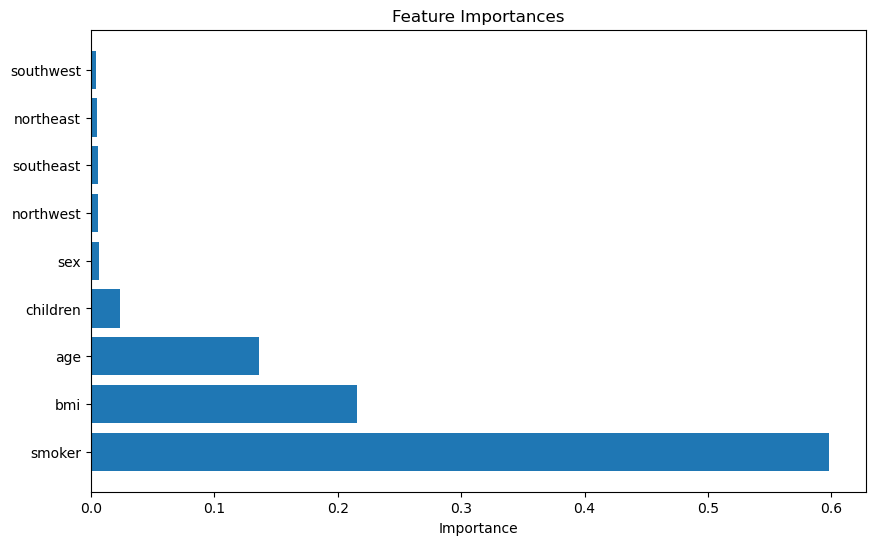

In [88]:
feature_importances = rand_forest_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

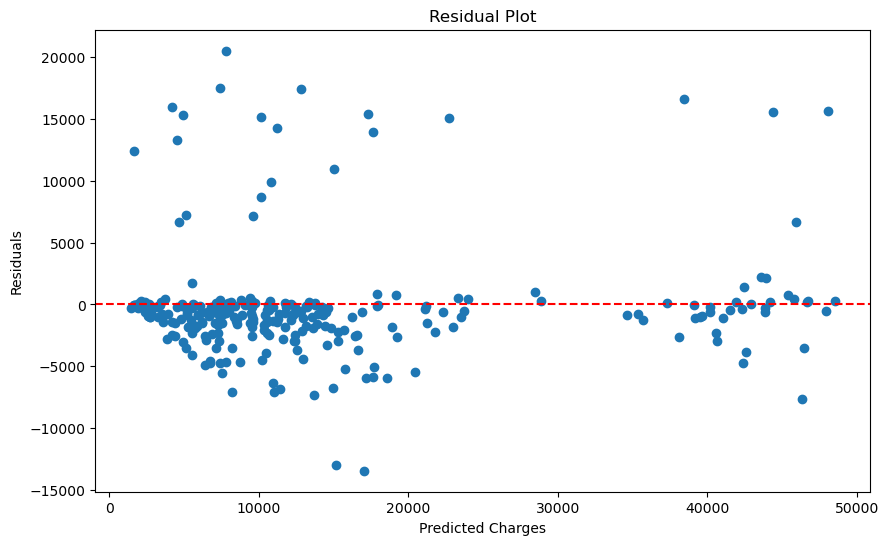

In [89]:
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [90]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 2572.81
R-squared: 0.88


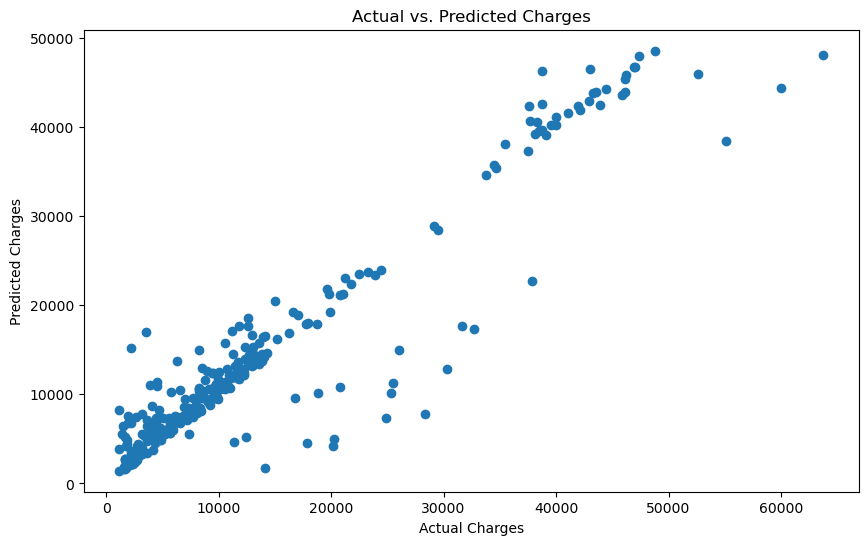

In [91]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges')
plt.show()

In [95]:
import shap

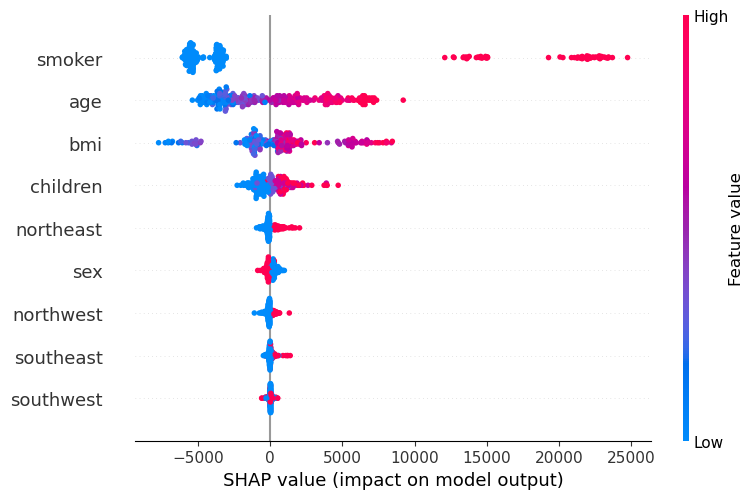

In [97]:
explainer = shap.TreeExplainer(rand_forest_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [98]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [99]:
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])
df['region'] = LabelEncoder().fit_transform(df['region'])

In [100]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
sarimax_model = SARIMAX(endog=y_train, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_result = sarimax_model.fit(disp=False)

An unsupported index was provided and will be ignored when e.g. forecasting.
An unsupported index was provided and will be ignored when e.g. forecasting.
Maximum Likelihood optimization failed to converge. Check mle_retvals


In [102]:
sarimax_predictions = sarimax_result.get_forecast(steps=len(X_test), exog=X_test)
sarimax_mean = sarimax_predictions.predicted_mean

No supported index is available. Prediction results will be given with an integer index beginning at `start`.


In [103]:
arimax_model = ARIMA(endog=y_train, exog=X_train, order=(1, 1, 1))
arimax_result = arimax_model.fit()

An unsupported index was provided and will be ignored when e.g. forecasting.
An unsupported index was provided and will be ignored when e.g. forecasting.
An unsupported index was provided and will be ignored when e.g. forecasting.
Maximum Likelihood optimization failed to converge. Check mle_retvals


In [104]:
arimax_predictions = arimax_result.get_forecast(steps=len(X_test), exog=X_test)
arimax_mean = arimax_predictions.predicted_mean

No supported index is available. Prediction results will be given with an integer index beginning at `start`.


In [105]:
mse_sarimax = mean_squared_error(y_test, sarimax_mean)
rmse_sarimax = np.sqrt(mse_sarimax)

mse_arimax = mean_squared_error(y_test, arimax_mean)
rmse_arimax = np.sqrt(mse_arimax)

In [106]:
print(f"SARIMAX Root Mean Squared Error: {rmse_sarimax:.2f}")
print(f"ARIMAX Root Mean Squared Error: {rmse_arimax:.2f}")

SARIMAX Root Mean Squared Error: 6435.24
ARIMAX Root Mean Squared Error: 6018.36


In [107]:
from sklearn.metrics import r2_score

In [109]:
r2_sarimax = r2_score(y_test, sarimax_mean)

In [110]:
r2_arimax = r2_score(y_test, arimax_mean)

In [111]:
print(f"SARIMAX R-squared: {r2_sarimax:.2f}")
print(f"ARIMAX R-squared: {r2_arimax:.2f}")

SARIMAX R-squared: 0.77
ARIMAX R-squared: 0.80


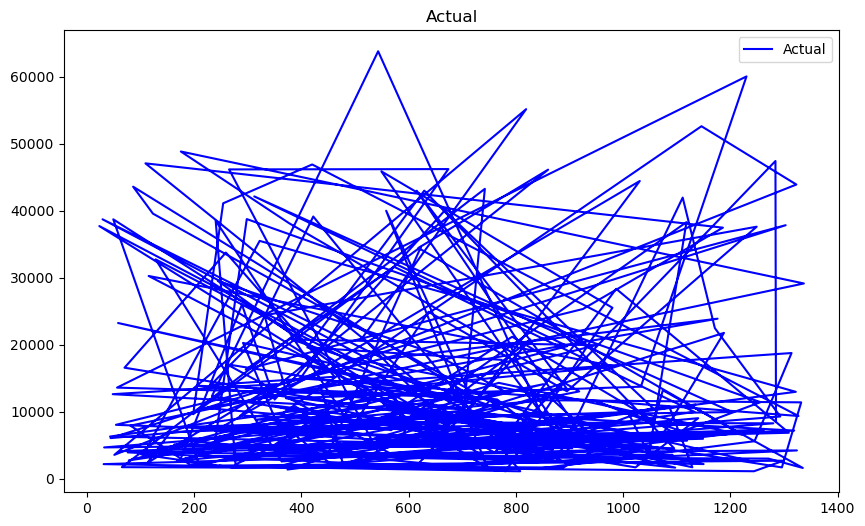

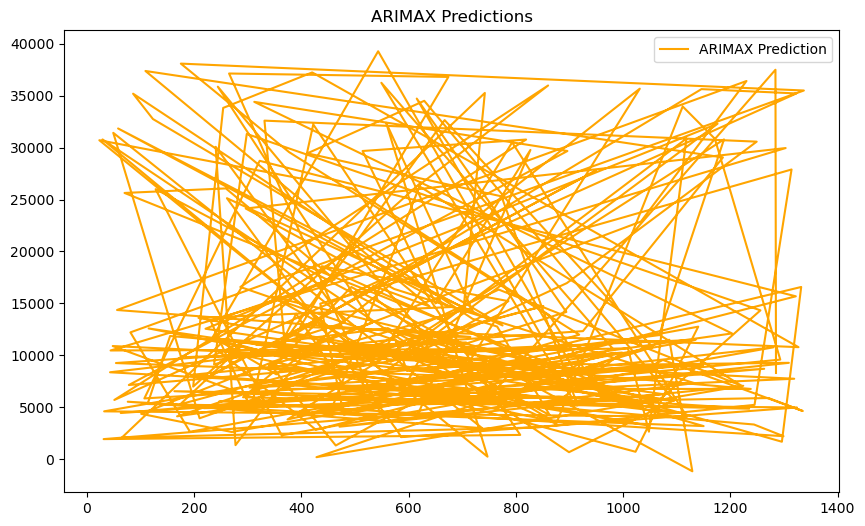

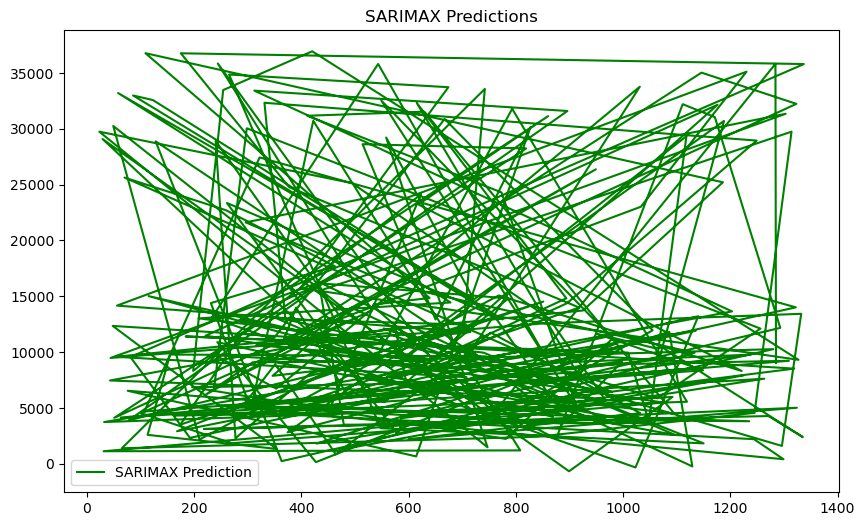

In [117]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.legend()
plt.title('Actual')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, arimax_mean, label='ARIMAX Prediction', color='orange')
plt.legend()
plt.title('ARIMAX Predictions')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, sarimax_mean, label='SARIMAX Prediction', color='green')
plt.legend()
plt.title('SARIMAX Predictions')
plt.show()

In [119]:
import seaborn as sns

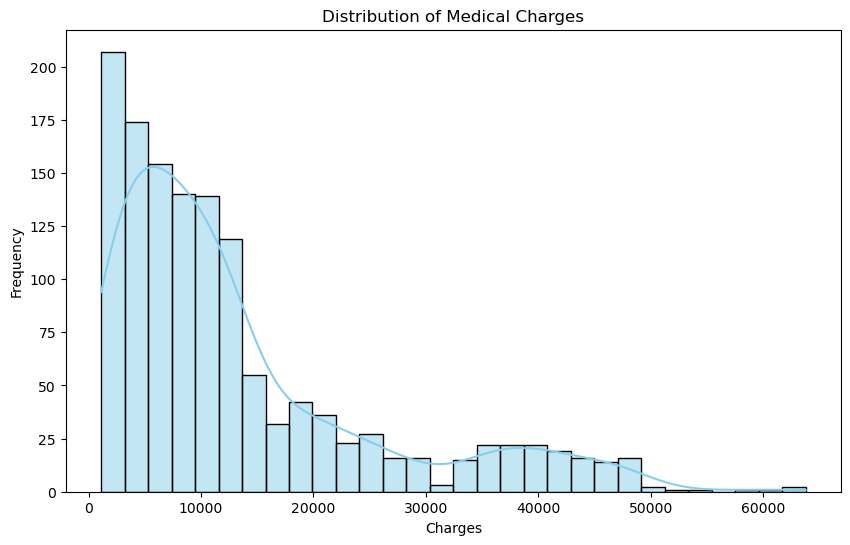

In [120]:
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

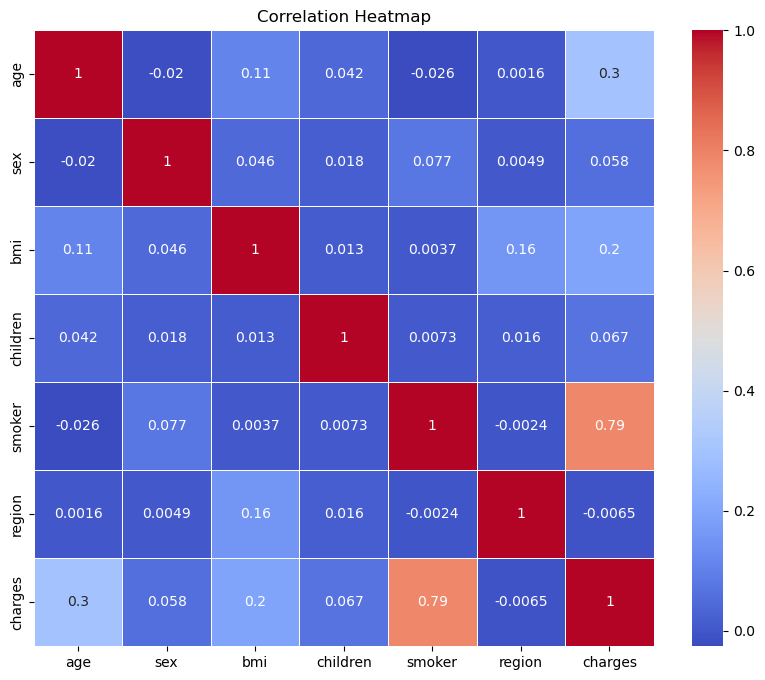

In [124]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

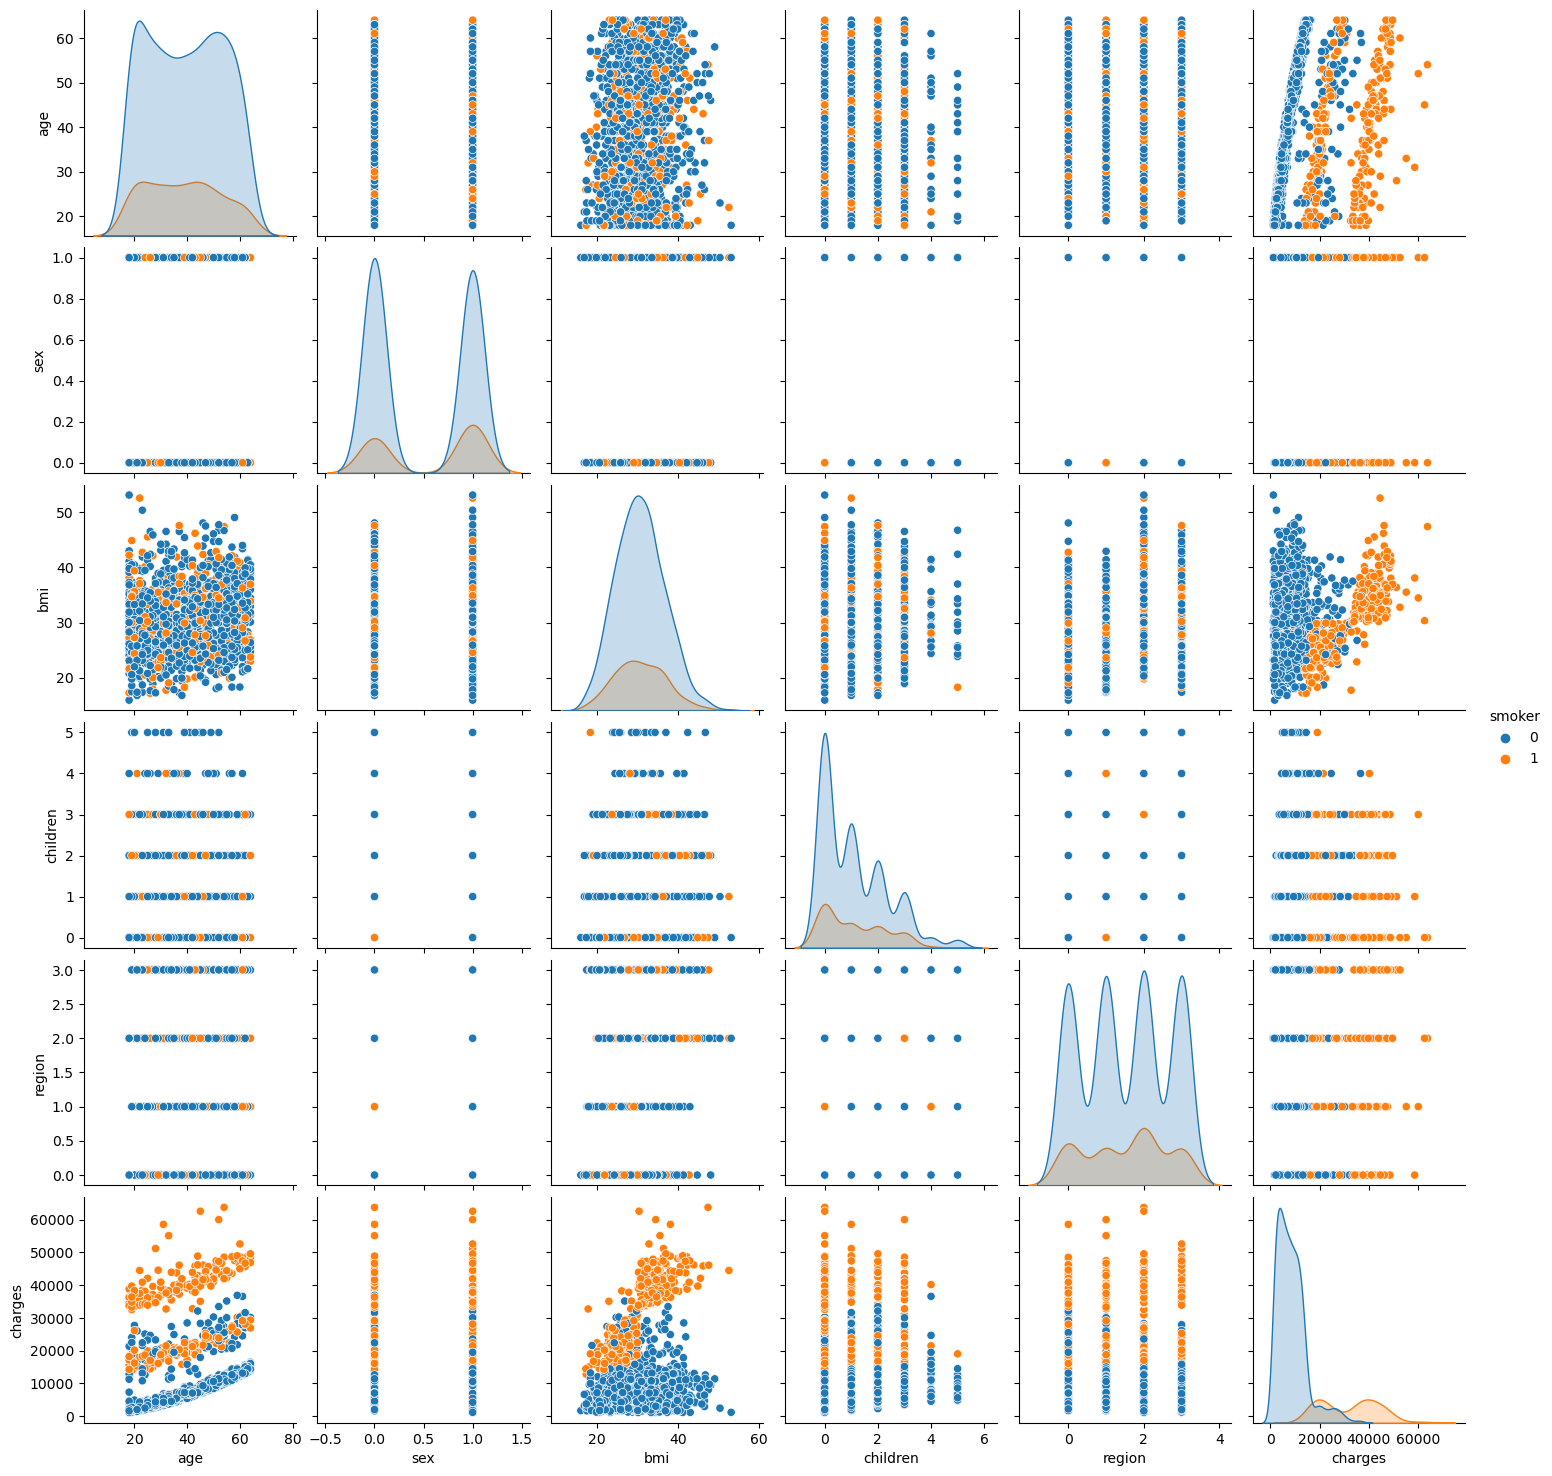

In [125]:
sns.pairplot(df, hue='smoker', diag_kind='kde')
plt.show()

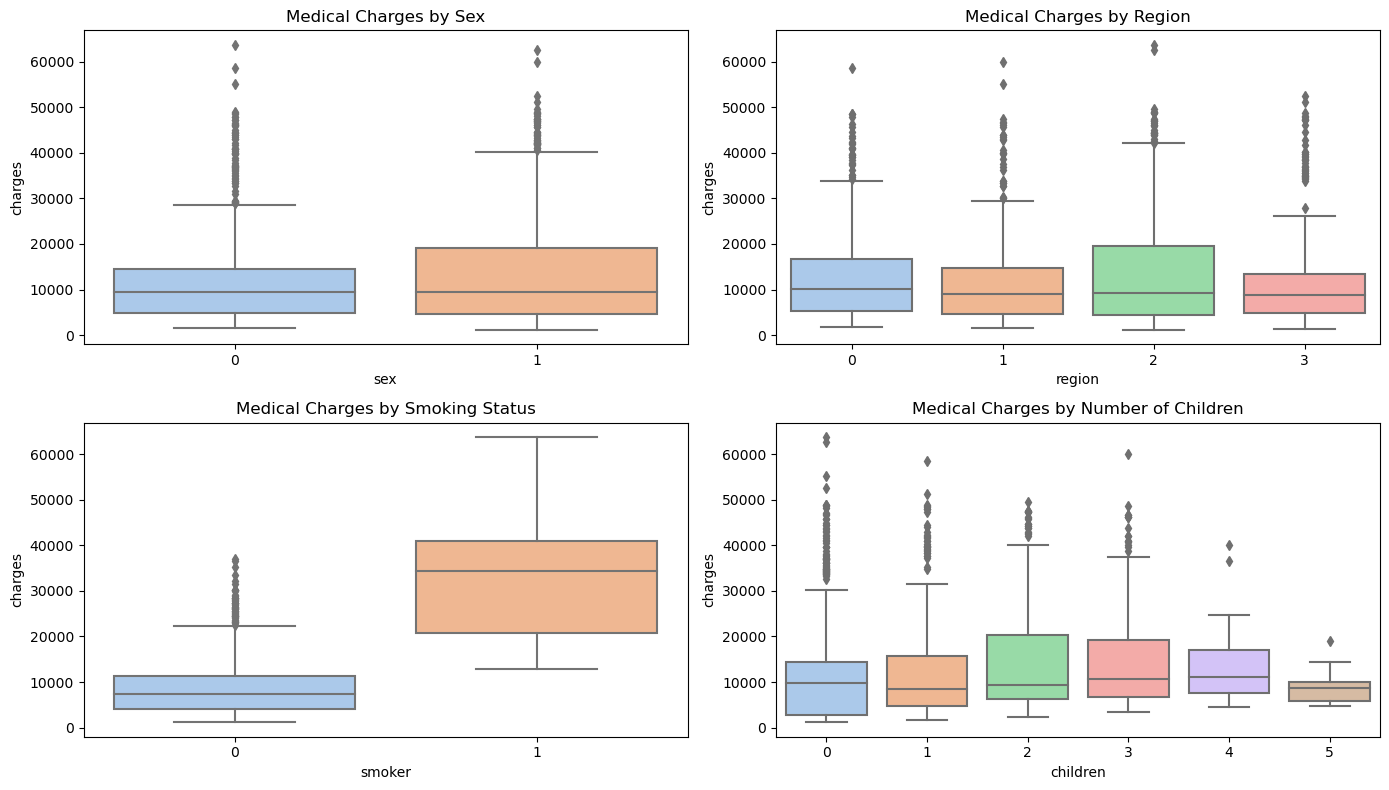

In [126]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='sex', y='charges', data=df, palette='pastel')
plt.title('Medical Charges by Sex')

plt.subplot(2, 2, 2)
sns.boxplot(x='region', y='charges', data=df, palette='pastel')
plt.title('Medical Charges by Region')

plt.subplot(2, 2, 3)
sns.boxplot(x='smoker', y='charges', data=df, palette='pastel')
plt.title('Medical Charges by Smoking Status')

plt.subplot(2, 2, 4)
sns.boxplot(x='children', y='charges', data=df, palette='pastel')
plt.title('Medical Charges by Number of Children')

plt.tight_layout()
plt.show()

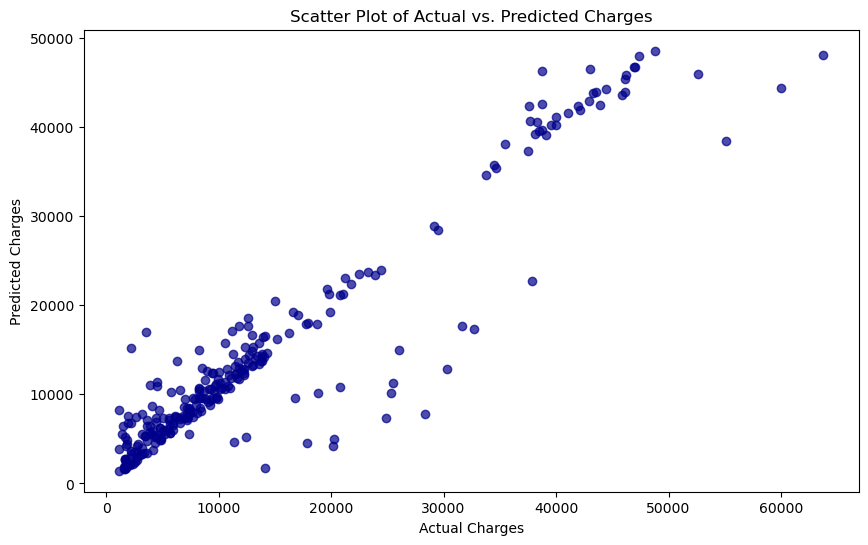

In [127]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.7, color='darkblue')
plt.title('Scatter Plot of Actual vs. Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

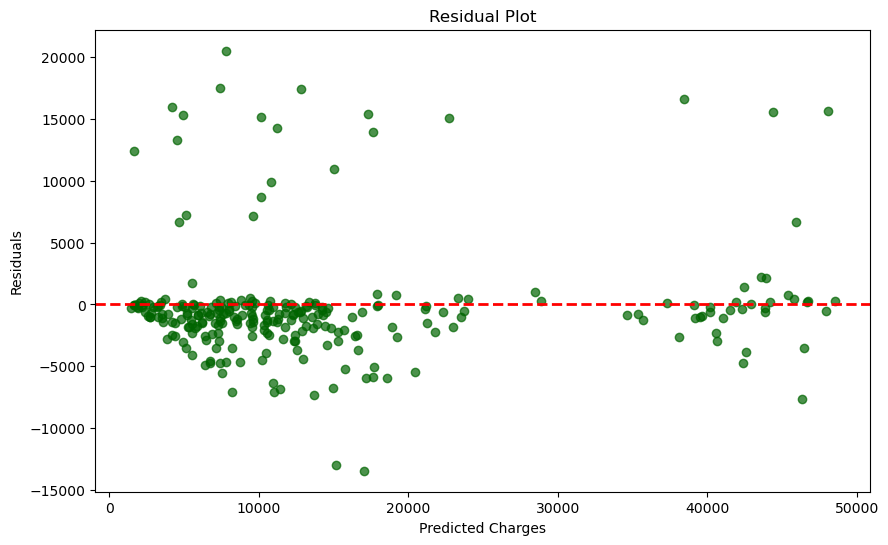

In [128]:
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.7, color='darkgreen')
plt.title('Residual Plot')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.show()